# Assignment 4: Optimizing Logistic Regression

In [5]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In this assignment, you will continue practicing the fourth step of the machine learning life cycle and train logistic regression models that will be used to solve a classification problem.  You will build many variants, each one with a different value of the $C$ hyperparameter, which governs the amount of regularization used. Regularization is a process where we add a "penalty" to the original log loss function. This penalty is a function of the magnitudes of the weights learned in the Logistic Regression. The following shows the regularized log loss using what is called "L2" regularization.<br><br> 

<center>$Regularized \ LogLoss = -\frac{1}{N} \sum\limits_{i=1}^N (y_ilog(P_i)+(1-y_i)log(1-P_i))+\frac{1}{C} \sum\limits_{j=1}^m w_j^2$</center><br><br>


With L2 regularization, the penalty is the sum of the squares of the weights scaled by a constant $1/C$. When the hyperparameter $C$ is large, we reduce the weight of the penalty, which results in less regularization. You will build Logistic regressions with different values of $C$ and will check how this impacts the log loss.


You will complete the following tasks:

1. Build your DataFrame and define your ML problem:
    * Load the "cell2cell" data set into a DataFrame
    * Define the label - what are you predicting?
    * Identify features
3. Create labeled examples from the data set
4. Split the data into training and test data sets
5. Train logistic regression classifiers and evaluate their performances:
    * Fit logistic regression models to the training data using different hyperparameter values per classifier
    * Evaluate the accuracy of each model's predictions
    * Plot and analyize the resulting log loss and accuracy scores

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the "cell2celltrain" data set. This version of the data set has been preprocessed and is ready for modeling.

In [6]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")

**Task**: Load the data and save it to DataFrame `df`.

In [7]:
df = pd.read_csv(filename)

#### Define the Label

This is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

To implement a Logistic Regression model, we must use only the numeric columns. 


<b>Task</b>: Use the Pandas DataFrame <code>select_dtypes()</code> method to obtain all of names of columns that have a dtype of "float64." Save the result to a list named `feature_list`. 

In [8]:
# Identifies the "float64" columns.
feature_list = df.select_dtypes(include=['float64']).columns.tolist()

# Displays the list in order to check for correctness.
feature_list

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating',
 'HandsetPrice']

## Part 2. Create Labeled Examples from the Data Set 

Our data is fully prepared for modeling. We can now create labeled examples from DataFrame `df`.

<b>Task</b>: Obtain the feature columns from DataFrame `df` and assign to `X`. Obtain the label column from DataFrame `df` and assign to `y`.

You should have 51047 labeled examples. Each example contains 35 features and one label.

In [9]:
# Defines the feature columns (any column other than 'Churn').
X = df[feature_list]

# Defines the label column, which is 'Churn', of course.
y = df['Churn']

print(X.shape, y.shape)

(51047, 35) (51047,)


## Part 3. Create Training and Test Data Sets

<b>Task</b>: Create training and test data sets out of the labeled examples. Save the results to variables `X_train, X_test, y_train, y_test`.

In [10]:
# Splits the training and test data sets out of the labeled examples, X and y.
# I did not specify the test size or random_state since it did not ask me to.
X_train, X_test, y_train, y_test = train_test_split(X, y)

<b>Task</b>: Check the dimensions of the training and test data sets.

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(38285, 35) (12762, 35) (38285,) (12762,)


## Part 4. Train a Logistic Regression Classifier and Evaluate the Model

The code cell below contains a function definition `train_test_LR()`. 

Inspect the function definition `train_test_LR(X_train, X_test, y_train, y_test, c=1)`. The function expects the training and test data sets, as well as a value for hyperparameter $C$. Note that we supplied the value of 1 for $C$ by default.

<b>Task:</b> Complete the function to make it work.

This function should:
1. train a Logistic Regression model on the training data
2. test the resulting model on the test data
3. compute and return two items:
    * the log loss of the resulting probability predictions on the test data 
    * the accuracy score of the resulting predicted class labels on the test data


You will use the scikit-learn [```LogisticRegression``` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and will provide the arguments `C=c` when creating the model object.




In [12]:
# I used c instead of C as the hyperparameter since the next task infers that this is the default value.
def train_test_LR(X_train, y_train, X_test, y_test, c = 1):
    
    '''
    1. Trains a Logistic Regression model on the training data.
    2. Tests the resulting model on the test data.
    3. Computes and returns two items:
        - The log loss of the resulting probability predictions on the test data.
        - The accuracy score of the resulting predicted class labels on the test data.
    Parameters:
        - C = Hyperparameter that governs the amount of regularization used.
    '''
    
    # Creates a Logistic Regression model object with the arguments C = c.
    # I did not specify the max_iter since it did not ask me to.
    model = LogisticRegression(C = c)
    # Trains the model using the training data.
    model.fit(X_train, y_train)
    # Gets the test data probability predictions.
    y_pred_proba = model.predict_proba(X_test)
    # Gets test data predictions.
    y_pred = model.predict(X_test)
    # Calculates the log loss.
    loss = log_loss(y_test, y_pred_proba)
    # Calculates the accuracy.
    accuracy = accuracy_score(y_test, y_pred)
    
    return loss, accuracy

### Train a Model and Analyze the Results

<b>Task:</b> Use your function `train_test_LR()` to train one Logistic Regression classifier with the default value of hyperparameter C (`c=1`). Print the resulting log loss and accuracy score.

In [13]:
# Trains the Logistic Regression model when c = 1.
loss, accuracy = train_test_LR(X_train, y_train, X_test, y_test, c = 1)

# Prints the log loss and accuracy score.
print(f"Log Loss: {loss}")
print(f"Accuracy: {accuracy}")

Log Loss: 0.5788118494055433
Accuracy: 0.7168155461526406


## Part 5. Train on Different Hyperparameter Values and Analyze the Results

Now we will adjust the $C$ regularization hyperparameter to check its impact on the model's log loss and accuracy. Hyperparameter `C` stands for the inverse of regularization strength. Smaller values specify stronger regularization and a simpler model. Larger values specify weaker regularization and a more complex model.<br>

The code cell below creates a list `cs` of twenty values of $C$.  Every item in the list has a value $10^i$ for every integer $i$ in the output of `range(-10,10)`. Run the code cell below and inspect the different values of $C$.

In [14]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

<b>Task</b>: In the code cell below, loop over list `cs` and train and evaluate a different Logistic Regression model for every value of $C$. Use your function `train_test_LR()`. Print the resulting log loss and accuracy scores per model.

We will want to create visualizations that plot the resulting log loss and accuracy score for every value of hyperparameter $C$. Considering this, save the resulting log loss values and accuracy scores that your function returns to two different lists. You will use these lists to create plots later.

In [15]:
log_losses = []
accuracies = []

# Iterates through the cs list...
for c in cs:
    # Trains the model when c = c (since that is what updates through the loop).
    loss, accuracy = train_test_LR(X_train, y_train, X_test, y_test, c = c)
    # Saves the results to the lists.
    log_losses.append(loss)
    accuracies.append(accuracy)
    
    # Prints the final results (to use later).
    print(f"C = {c}: Log Loss = {loss}, Accuracy = {accuracy}")

C = 1e-10: Log Loss = 0.5950753754948035, Accuracy = 0.7179125528913963
C = 1e-09: Log Loss = 0.5950751143420779, Accuracy = 0.7179125528913963
C = 1e-08: Log Loss = 0.5950725110434634, Accuracy = 0.7179125528913963
C = 1e-07: Log Loss = 0.5950465816181433, Accuracy = 0.7179125528913963
C = 1e-06: Log Loss = 0.5947971758636611, Accuracy = 0.7179125528913963
C = 1e-05: Log Loss = 0.5929281274376779, Accuracy = 0.7179125528913963
C = 0.0001: Log Loss = 0.5864354693513413, Accuracy = 0.7179125528913963
C = 0.001: Log Loss = 0.5800111614425666, Accuracy = 0.7168155461526406
C = 0.01: Log Loss = 0.5788078623334142, Accuracy = 0.7167371885284438
C = 0.1: Log Loss = 0.5788053340652834, Accuracy = 0.7170506190252312
C = 1: Log Loss = 0.5788118494055433, Accuracy = 0.7168155461526406
C = 10: Log Loss = 0.5788127418798872, Accuracy = 0.7168939037768375
C = 100: Log Loss = 0.5788128349466688, Accuracy = 0.7168939037768375
C = 1000: Log Loss = 0.5788128442314698, Accuracy = 0.7168939037768375
C = 

Now let's visualize the results. 

Before we create plots, let's reformat the hyperparameter values in list `cs` so that they can be easily visualized in our plots. We will take the log 10 of the hyperparameter values and save it to a new list called `cs_log10`. Let's take a look at the original values and transformed values:
 

In [16]:
cs_log10 = np.log10(cs)

# Original values...
print(cs)
# Transformed values...
print(cs_log10)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]



#### Plot Log Loss

<b>Task:</b> Create a `seaborn` lineplot to plot the resulting log loss for every value of hyperparameter $C$. The hyperparameter $C$ should be plotted on the x axis and the log loss should be plotted on the y axis. Label the x and y axes accordingly. Use the transformed values of hyperparameter $C$ contained in the list `cs_log10`.

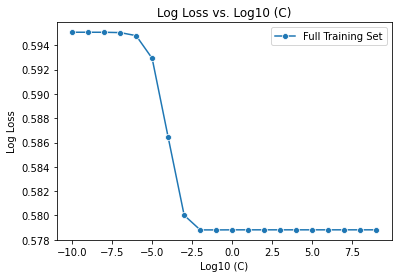

In [17]:
sns.lineplot(x = cs_log10, y = log_losses, marker = 'o', label = 'Full Training Set')

plt.xlabel('Log10 (C)')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Log10 (C)')

plt.show()

<b>Analysis</b>: Which value of $C$ yields the best results, in terms of loss?

Considering the fact that a lower log loss yields the best predictions, this value is 0.5788053340652834 when C = 0.1. The cs_log10 value of 0.1 is -1, which is what is displayed on this plot.

#### Plot Accuracy

<b>Task:</b> Create a `seaborn` lineplot to plot the resulting accuracy score for every value of hyperparameter $C$. The hyperparameter $C$ should be plotted on the x axis and the accuracy score should be plotted on the y axis. Label the x and y axes accordingly. Use the transformed values of hyperparameter $C$ contained in the list `cs_log10`.

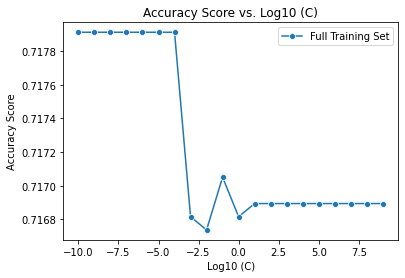

In [18]:
sns.lineplot(x=cs_log10, y=accuracies, marker='o', label = 'Full Training Set')

plt.xlabel('Log10 (C)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Log10 (C)')

plt.show()

<b>Analysis</b>: Which value of $C$ yields the best results, in terms of accuracy?

The value of C that yields the best results is C = 1e−10 to C = 0.0001, as they all have the highest accuracy of 0.7179125528913963. The cs_log10 value of each, respectively, are: -10, -9, -8, -7, -6, -5, and -4, which is what is displayed on this plot.